# **Machine Learning**

## **Project**

#### Name - Parth Kulshreshtha(210C2030159), Anmol Jhamb(210C2030157)

#### Batch - B. Tech CSE(2021)

#### Date - 18th April, 2023
---

### **Problem Statement**

Perform suitable analysis on the features and build suitable predictive models to solve this classification problem. The task is to predict the presence or absence of W disease (CVD) using the patient examination results.<br>

**Dataset Link:**
https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset?datasetId=107706&sortBy=voteCount

---


### **Table of Contents**

1. [Importing important Libraries and Dataset](#importing-important-libraries-and-dataset)
2. [Data Pre-Processing](#data-pre-processing)
3. [Outlier Detection](#outlier-detection)
4. [Exploratory Data Analysis](#exploratory-data-analysis)
5. [Feature Engineering](#feature-engineering)
6. [Feature Selection](#feature-selection)
7. [Model Building](#model-building)
8. [Model Comparision and Selection](#model-comparision-and-selection)
9. [Hyperparameter Tuning](#hyperparameter-tuning)
10. [Conclusion](#conclusion)
---

### **Importing important Libraries and Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
import pandas_profiling as pp

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

/tmp/ipykernel_14249/2859304335.py:7: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [2]:
df = pd.read_csv('cardio_train.csv', sep=';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
df.shape

(70000, 13)

### **Data Pre-Processing**

In [4]:
# check for duplicate rows in the dataframe
duplicates = df.duplicated()
duplicates.sum()

0

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
missing_cols = missing_values[missing_values > 0].index.tolist()
print("Columns with missing values: ", missing_cols)

Columns with missing values:  []


In [6]:
# Check for null values
null_values = df.isna().sum()
null_cols = null_values[null_values > 0].index.tolist()
print("Columns with null values: ", null_cols)

Columns with null values:  []


**We can conlude that:**
- no missing values
- no duplicate data
- no null/NaN values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [8]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


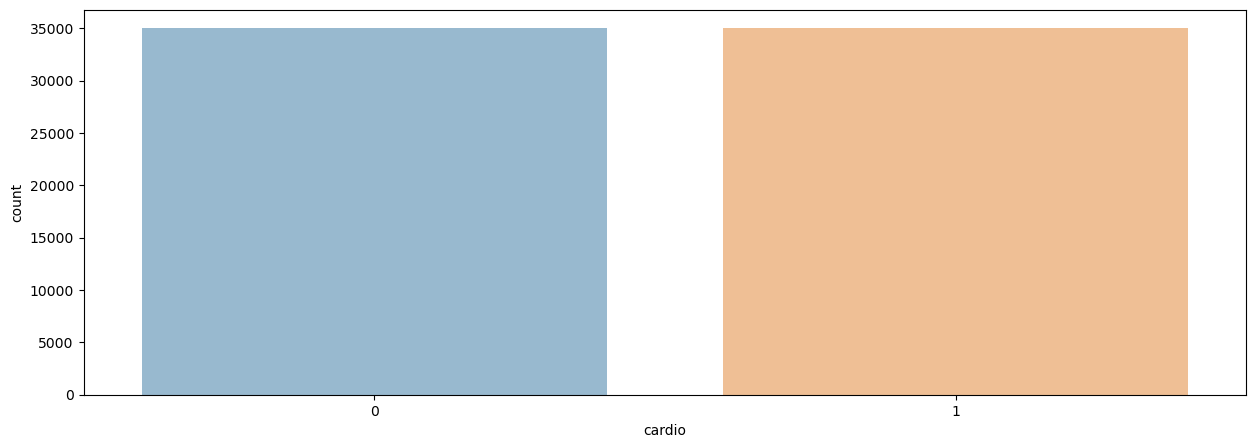

In [9]:
# Evaluating features (cardio) contribution towards the label
fig = plt.figure(figsize=(15,5))
ax = sns.countplot(x='cardio',data=df,alpha=0.5)

The graph show that there is an equal number of instances for each class in the dataset. This is a desirable property for a classification problem, as it avoids any bias towards one class and ensures that the model is equally trained on all classes.

In [10]:
# label count
df.cardio.value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

### **Outlier Detection**

In [11]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


If we look attentively at the height and weight columns, we can see that the minimum height is 55 cm and the minimum weight is 10 kg. That had to be an error, because the minimum age is 10798 days, or 29 years.<br>
However, the maximum height is 250 cm and the maximum weight is 200 kg, which may be meaningless while generating statistics. We can cope with these errors by removing outliers.


Let's remove weights and heights, that fall below 2.5% or above 97.5% of a given range.

In [12]:
df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True)

In addition, in some cases diastolic pressure is higher than systolic, which is also  incorrect. How many records are inaccurate in terms of blood pressure?

In [13]:
print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

Diastilic pressure is higher than systolic one in 1082 cases


Let's get rid of the outliers, moreover blood pressure could not be negative value!

In [14]:
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True)

Diastilic pressure is higher than systolic one in 0 cases


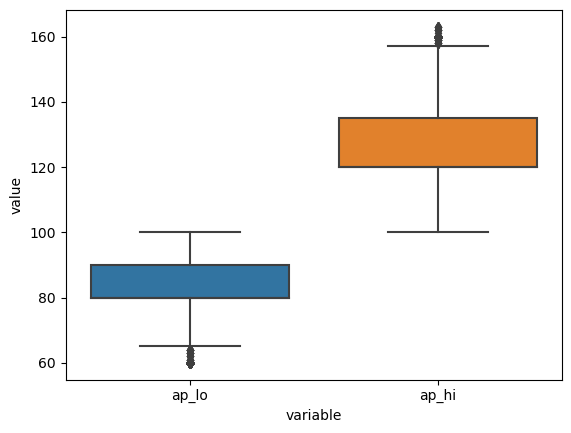

In [15]:
blood_pressure = df.loc[:,['ap_lo','ap_hi']]
sns.boxplot(x = 'variable',y = 'value',data = blood_pressure.melt())
print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

### **Exploratory Data Analysis** 

In [16]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

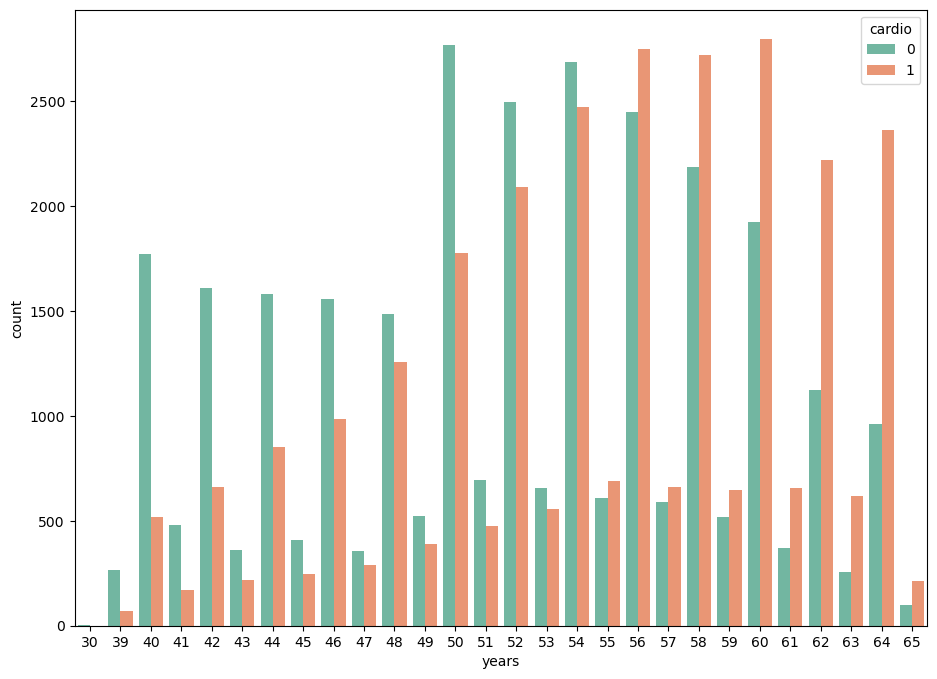

In [17]:
rcParams['figure.figsize'] = 11, 8
df['years'] = (df['age'] / 365).round().astype('int')
sns.countplot(x='years', hue='cardio', data = df, palette="Set2");

It can be observed that people over 55 of age are more exposed to CVD.

**Catagorical Variables and their Distribution**

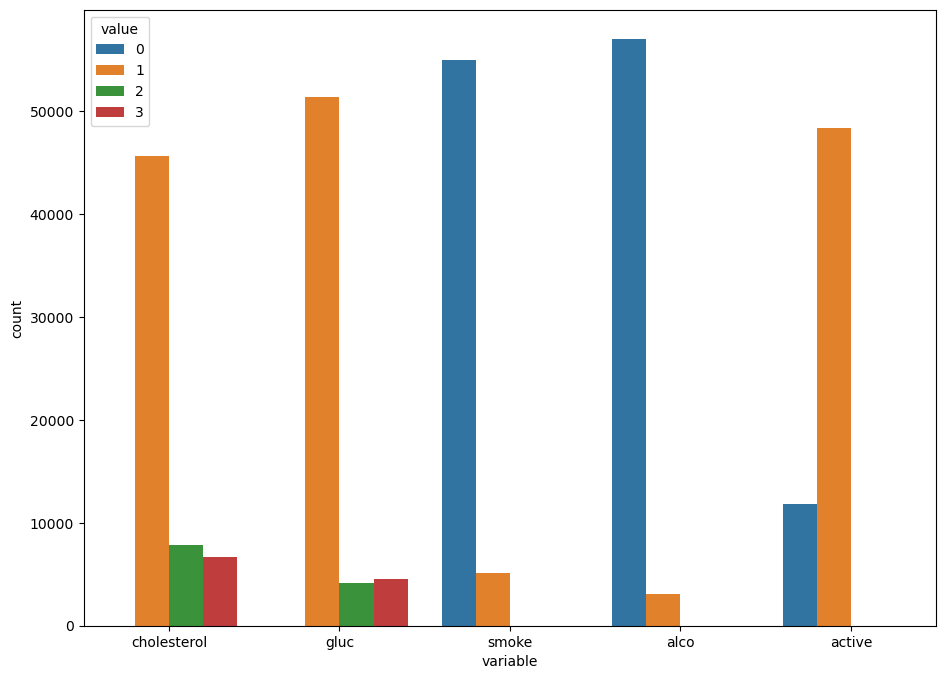

In [18]:
df_categorical = df.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
sns.countplot(x="variable", hue="value",data= pd.melt(df_categorical));

**Catagorical variable split according to the Target Class**

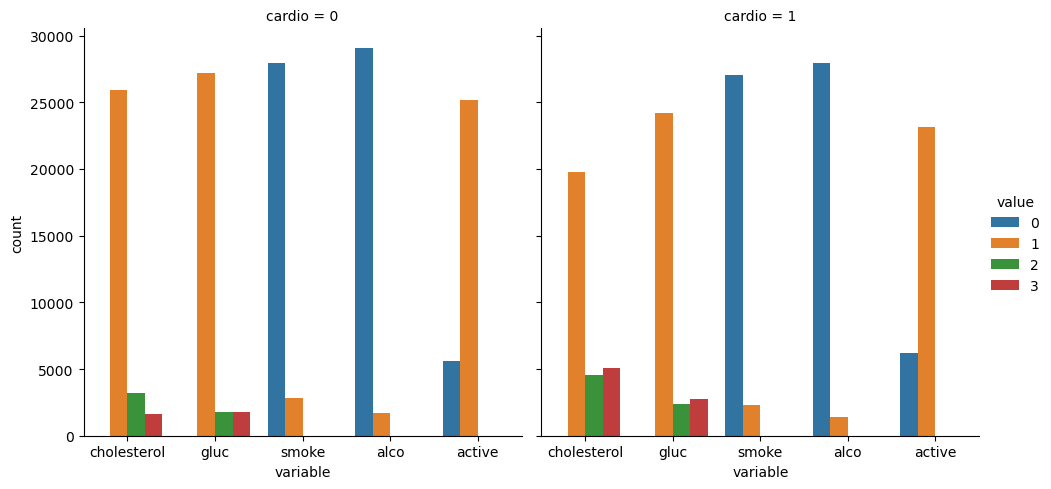

In [19]:
df_long = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio",
                data=df_long, kind="count")

It can be clearly seen that patients with CVD have higher cholesterol and blood glucose level. And, generally speaking less active.

To figure out whether "1" stands for women or men in gender column, let's calculate the mean of height per gender. We assume that men are higher than women on average.

In [20]:
df.groupby('gender')['height'].mean()

gender
1    162.055434
2    169.251915
Name: height, dtype: float64

Average height for "2" gender is greater, than for "1" gender:
- 1 - Female
- 2 - Male

Let's see how many men and women presented in the dataset:

In [21]:
df['gender'].value_counts()

1    39254
2    20888
Name: gender, dtype: int64

**Who more often report consuming alcohol - men or women?**

In [22]:
df.groupby('gender')['alco'].sum()

gender
1     973
2    2147
Name: alco, dtype: int64

So, men consume alcohol more frequently on an average.

### **Feature Engineering**

We are making two new features that are:
- BMI
- Pulse

In [23]:
df['BMI'] = df['weight']/((df['height']/100)**2)
df['pulse'] = np.subtract(df['ap_hi'], df['ap_lo'])
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,BMI,pulse
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,30
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,50
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52,23.507805,60
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,50
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48,23.011177,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,1,1,0,0,1,1,54,23.661439,40
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1,58,29.384757,70
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,53,26.927438,40
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251,55


### **Feature Selection**

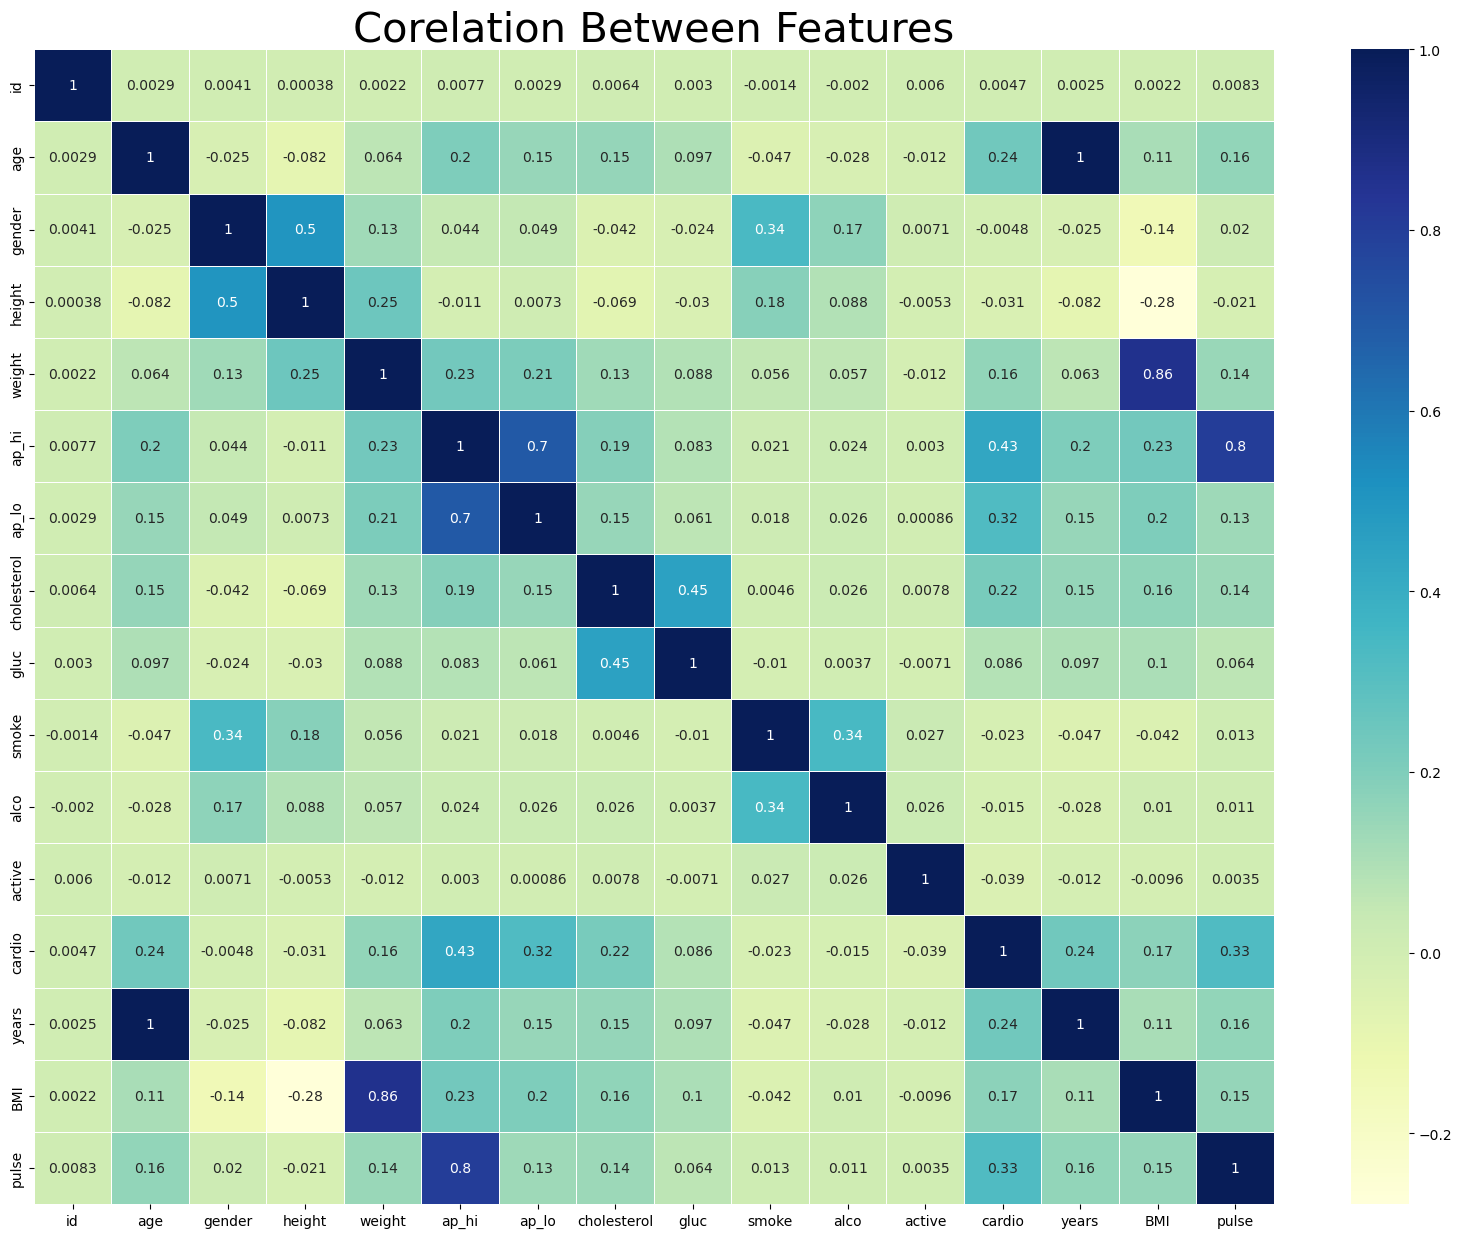

In [24]:
plt.rcParams['figure.figsize'] = (20, 15) 
sns.heatmap(df.corr(), annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features', fontsize = 30)
plt.show()

| Features with Strong Correlation with Target Value  |      Correlation with Target Value      |  Strong Correlation with another feature |
|----------|:-------------:|------:|
| age |    0.24   |   ap_hi ( 0.21 ) |
| ap_hi |  0.43 | pulse ( 0.82 ) ap_lo ( 0.72 ) weight ( 0.26 ) age ( 0.21 )|
| ap_lo |  0.33 | ap_hi ( 0.72 ) bmi ( 0.23 ) weight ( 0.24 )|
| cholesterol | 0.21 |    gluc ( 0.44 ) |
| pulse  | 0.33 |    ap_hi ( 0.82 ) |

Basically, you would like to have features with good amount of correlation with target feature and low correlation with any independent feature <br>
In simple words, high correlation within independent features means both wanna represent same thing and even if you drop one of the feature, you won't lose much quality data 

>* ap_hi has the correlated with quite features but since it has the maximum correlation with Target Value, We can't afford to ignore it <br>
>* Similar case is with pulse and ap_lo

>* Unfortunately our newly formed feature 'bmi' doesn't have good correlation with target + corelates with ap_lo
>* Similar case is with weight

>* 'gender' is the least correlated feature + adding correlation with smoke and height 

>* Features like height, smoke, alco, active have quite low amount of correlation with target feature

Preserving Good data, We'll gonna drop 'bmi',  'weight',  'gluc',  'gender',  'height',  'smoke',  'alco',  'active'

### **Model Building**

In [25]:
X = df.drop(['cardio', 'BMI', 'weight', 'gluc', 'gender', 'smoke', 'alco', 'active'], axis =1)
y = df['cardio']

In [26]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build and evaluate models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'SVM': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    results.append((name, accuracy, recall, precision, f1))

# Create a pandas dataframe to display the results
df1 = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1-Score'])
df1.set_index('Model', inplace=True, drop=True)
print(df1)

                     Accuracy    Recall  Precision  F1-Score
Model                                                       
Logistic Regression  0.689242  0.689242   0.691021  0.687839
K-Nearest Neighbors  0.550795  0.550795   0.550586  0.550599
SVM                  0.596298  0.596298   0.598353  0.595572
Decision Tree        0.621183  0.621183   0.621101  0.621117
Random Forest        0.696835  0.696835   0.697126  0.696400


### **Model Comparision and Selection**

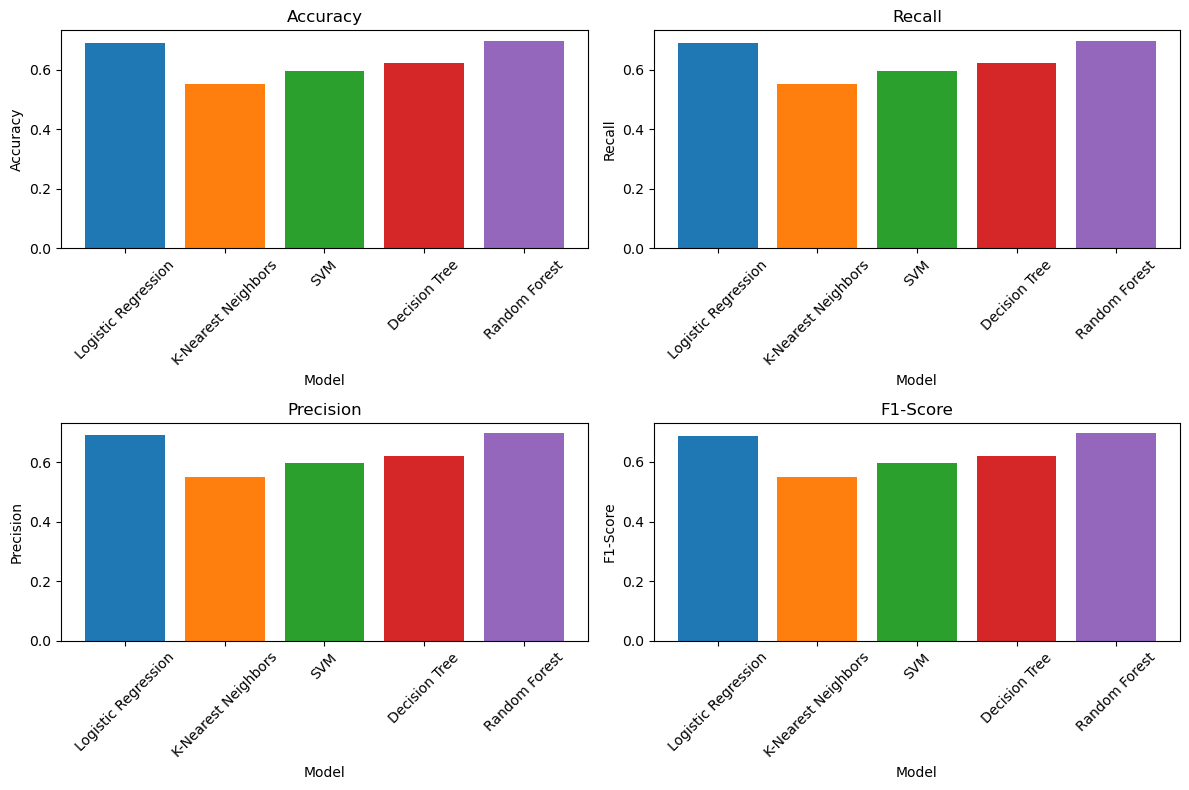

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Copy the dataframe from the previous code
df1 = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1-Score'])
df1.set_index('Model', inplace=True)

# Define the evaluation metrics to plot
metrics = ['Accuracy', 'Recall', 'Precision', 'F1-Score']

# Define the colors for each model
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Plot the results using a bar graph for each evaluation metric with Matplotlib
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for ax, metric in zip(axes.flatten(), metrics):
    for i, model in enumerate(df1.index):
        ax.bar(model, df1.loc[model, metric], color=colors[i])
    ax.set_title(metric)
    ax.set_xlabel('Model')
    ax.set_ylabel(metric)
    ax.tick_params(axis='x', rotation=45)
    
plt.tight_layout()
plt.show()


### **Hyperparameter Tuning**

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [80, 90],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10],
    'n_estimators': [100, 200]}
grid=GridSearchCV(RandomForestClassifier(),param_grid,verbose=1)
grid.fit(X_train,y_train)
grid.best_params_

Fitting 5 folds for each of 32 candidates, totalling 160 fits


{'max_depth': 90,
 'max_features': 2,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 200}

In [29]:
from sklearn.metrics import classification_report

grid_pred = grid.predict(X_test)
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.70      0.77      0.74      9210
           1       0.73      0.66      0.70      8833

    accuracy                           0.72     18043
   macro avg       0.72      0.72      0.72     18043
weighted avg       0.72      0.72      0.72     18043



By using GridSearchCV we have increased accuracy of this model from 69% to 72%.

### **Conclusion**

After careful consideration, we believe that the accuracy of 72% is because the most important factors such as smoking, gluc Alco, and others are heavily skewed towards being healthy, which means that the model will have the same values for these columns in most rows, but with the target variable changing, the model will be unable to capture the patterns that determine whether a person has the disease or not. As a result, the data must be randomised further, and more information, such as family history, must be incorporated.